In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# json 파일 다루기
import json

In [ ]:
# 파일 존재 여부 확인용
import os

In [ ]:
# 훈련용 데이터와 검증용 데이터 분리
from sklearn.model_selection import train_test_split

In [ ]:
# 딥러닝 모델로 예측진행
from tensorflow import keras

# 변수 목록

In [ ]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02. Fashion Type Classification Model')

In [ ]:
# 한번에 읽어올 이미지 개수
img_read_size = 200

# 크기 조정 사이즈
res_width = 200
res_height = 200

ori_img_dir_name = "./Dataset/Original/Male/Image/Normcore/" # 원본 이미지 파일이 존재하는 디릭토리명
ori_json_dir_name = "./Dataset/Original/Male/Json/Normcore/" # 원본 json 파일이 존재하는 디렉토리명

train_dir_name = "./Dataset/Train-Validation/Male/Train/" # Train 데이터를 저장할 디렉토리명
val_dir_name = "./Dataset/Train-Validation/Male/Validation/" # Validation 데이터를 저장할 디렉토리명

model_path = "./Model/binary_poly_seg_model_0113_01.keras"

In [ ]:
read_point = 2001

In [ ]:
# 세션이 중간에 끊길때를 대비한 수동저장

train_save_point = 12801
val_save_point = 3201

In [ ]:
train_save_point = train_end_point
val_save_point = val_end_point

print(train_save_point)
print(val_save_point)

12801
3201


# 데이터 불러오기

In [ ]:
dataset_list = []

while (len(dataset_list) < img_read_size):

    if read_point > 2000:
      break

    img_path = ori_img_dir_name + str(read_point) + ".jpg"
    json_path = ori_json_dir_name + str(read_point) + ".json"

    img_path = ori_img_dir_name + str(read_point) + ".jpg"
    json_path = ori_json_dir_name + str(read_point) + ".json"

    tmp_list = []

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        read_point = read_point+1
        continue
        print(str(read_point) + ".jpg File Load Failed!!")
        break

    # json 파일 로드
    with open(json_path, "r") as loadfile:
      json_file = json.load(loadfile)
    if json_file is None:
        print(str(read_point) + ".json File Load Failed!!")
        break


    tmp_list.append(img_file)
    tmp_list.append(json_file)

    dataset_list.append(tmp_list)

    if ((read_point)%50) == 0: # 진행도 체크용
        print(str(read_point) + "개 파일 읽어오기 완료")

    read_point = read_point+1


print()
print("Complete")
print("다음 read point: " + str(read_point))

1850개 파일 읽어오기 완료
1900개 파일 읽어오기 완료
1950개 파일 읽어오기 완료
2000개 파일 읽어오기 완료

Complete
다음 read point: 2001


In [ ]:
len(dataset_list)

200

In [ ]:
len(dataset_list[0])

2

# 모델 예측을 위해 이미지 크기 조정

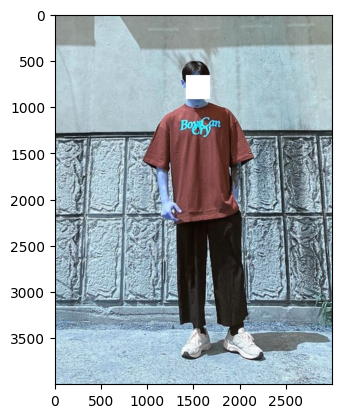

In [ ]:
# 원본 이미지 크기 확인
plt.imshow(dataset_list[0][0])
plt.show()

In [ ]:
for data in dataset_list:
    data[0] = cv2.resize(data[0], dsize=(res_height, res_width), interpolation=cv2.INTER_AREA)

print("Complete")

Complete


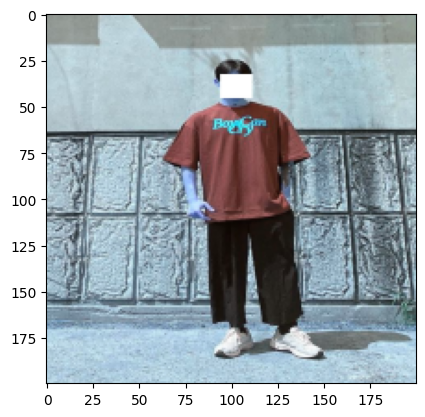

In [ ]:
# 조정된 이미지 크기 확인
plt.imshow(dataset_list[0][0])
plt.show()

# 폴리곤 좌표에서 라벨링 마스크 생성

In [ ]:
# 예측용 x 이미지 생성

img_x = []

for data in dataset_list:
    np_img = np.array(data[0])
    img_x.append(np_img)

img_x = np.array(img_x)
print(img_x.shape)

(200, 200, 200, 3)


In [ ]:
# 예측 진행

seg_model = keras.models.load_model(model_path)
preds = seg_model.predict(img_x)

print("Complete")

7/7 [==============================] - 56s 8s/step
Complete


In [ ]:
# 예측 결과를 마스크로 생성하고 dataset_list[i][2]에 저장
# dataset_list[i][0]은 원본 이미지, [1]은 json, [2]는 마스크 이미지

for i in range(0, len(preds)):
    mask = np.ndarray.round(preds[i])
    mask = mask.astype('uint8')
    dataset_list[i].append(mask)

print("Complete")

Complete


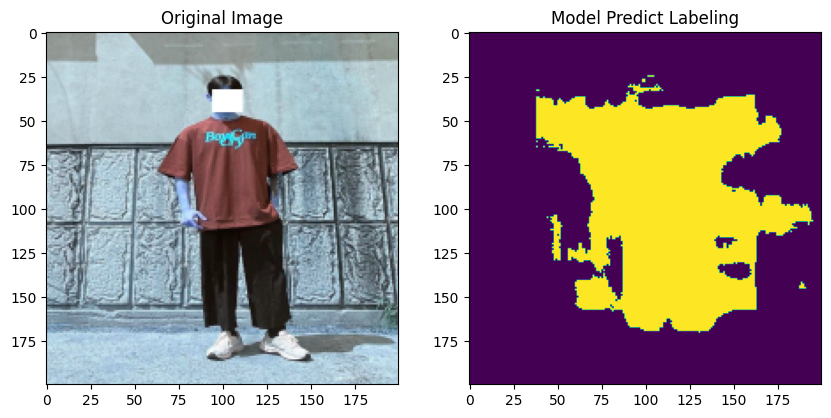

In [ ]:
# 리스트 형태 확인
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(dataset_list[0][0])
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(dataset_list[0][2])
plt.title("Model Predict Labeling")

plt.show()

## 원본 이미지에 마스크 적용하여 저장

### 테스트

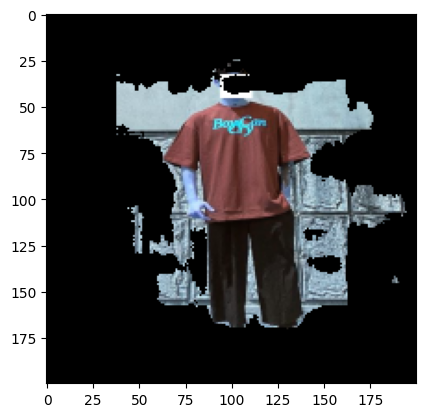

In [ ]:
# 마스크를 원본 이미지에 적용
sample_img_poly_crop = cv2.bitwise_and(dataset_list[0][0], dataset_list[0][0], mask=dataset_list[0][2])

plt.imshow(sample_img_poly_crop)
plt.show()

In [ ]:
# 렉트 좌표 자르기 테스트

x1 = res_width
y1 = res_height
x2 = 0
y2 = 0

for y in range(0, res_height):
    for x in range(0, res_width):
        if dataset_list[0][2][y][x] == 1:
            if x < x1:
                x1 = x
            elif x > x2:
                x2 = x

            if y < y1:
                y1 = y
            elif y > y2:
                y2 = y


print(x1, x2, y1, y2)

38 194 25 170


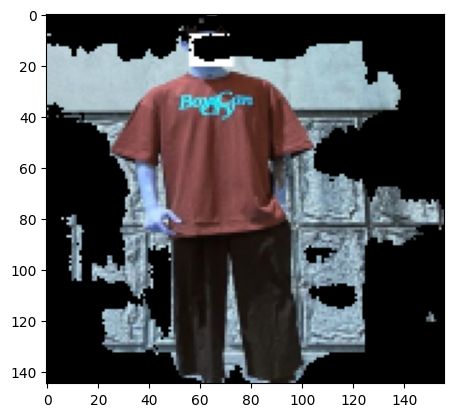

In [ ]:
# 렉트 좌표 자르기 테스트

x = x1
y = y1
w = x2-x1
h = y2-y1

sample_img_rect_crop = sample_img_poly_crop[y:y+h, x:x+w]
plt.imshow(sample_img_rect_crop)
plt.show()

### 전체 적용

In [ ]:
for i in range(0, len(dataset_list)):

    if (i%100) == 0: # 진행도 확인용
        print(str(i+1) + "번째 이미지 작업중...")


    dataset_list[i][0] = cv2.bitwise_and(dataset_list[i][0], dataset_list[i][0], mask=dataset_list[i][2])

    x1 = res_width
    y1 = res_height
    x2 = 0
    y2 = 0

    for y in range(0, res_height):
        for x in range(0, res_width):
            if dataset_list[i][2][y][x] == 1:
                if x < x1:
                    x1 = x
                elif x > x2:
                    x2 = x

                if y < y1:
                    y1 = y
                elif y > y2:
                    y2 = y

    x = x1
    y = y1
    w = x2-x1
    h = y2-y1

    dataset_list[i][0] = dataset_list[i][0][y:y+h, x:x+w]


print("Complete")

1번째 이미지 작업중...
101번째 이미지 작업중...
Complete


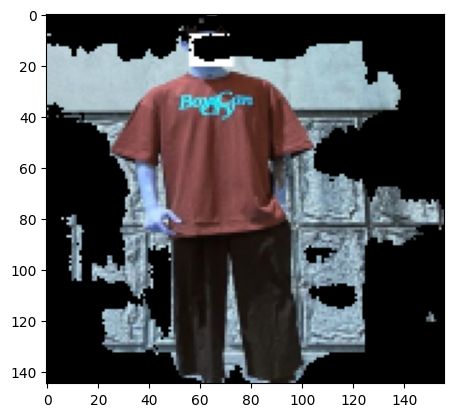

In [ ]:
plt.imshow(dataset_list[0][0])
plt.show()

# 이미지 크기 재조정

## 조정 후 이미지 출력 테스트

In [ ]:
res_img_sample = cv2.resize(dataset_list[0][0], dsize=(res_height, res_width), interpolation=cv2.INTER_AREA)

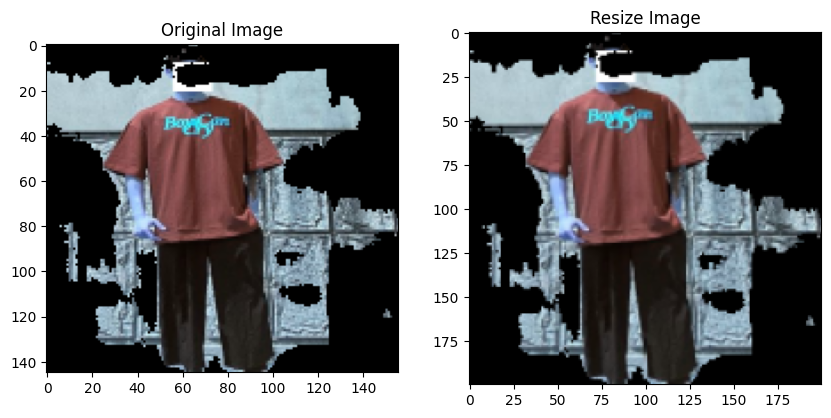

In [ ]:
# 리스트 형태 확인
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(dataset_list[0][0])
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(res_img_sample)
plt.title("Resize Image")

plt.show()

## 전체 이미지 크기 조정

In [ ]:
# 혹시 일부 이미지가 전부 마스크돼서 없어져버렸을 때 대비용 코드
# dataset_list[131][0] = cv2.flip(dataset_list[130][0], 1) # 1은 좌우반전, 0은 상하반전

In [ ]:
# plt.imshow(dataset_list[131][0])
# plt.show()

In [ ]:
for i in range(0, 200):
    dataset_list[i][0] = cv2.resize(dataset_list[i][0], dsize=(res_height, res_width), interpolation=cv2.INTER_AREA)

print("Complete")

Complete


# 변경된 이미지에 맞추어 Json 파일값 조정

## 이미지 Width, Height 정보 수정

In [ ]:
dataset_list[0][1]

{'Img_Height': 4000, 'Img_Width': 3000, 'Labeling': 'normcore'}

In [ ]:
for data in dataset_list:
    data[1]['Img_Width'] = res_width
    data[1]['Img_Height'] = res_height

print("Complete")

Complete


## 패션 라벨링 정보 변경

In [ ]:
for data in dataset_list:
    if data[1]['Labeling'] == 'ivy':
        data[1]['Labeling'] = 'Ivy'
    elif data[1]['Labeling'] == 'mods':
        data[1]['Labeling'] = 'Mods'
    elif data[1]['Labeling'] == 'hippie':
        data[1]['Labeling'] = 'Hippie'
    elif data[1]['Labeling'] == 'bold':
        data[1]['Labeling'] = 'Bold'
    elif data[1]['Labeling'] == 'hiphop':
        data[1]['Labeling'] = 'Hip-hop'
    elif data[1]['Labeling'] == 'metrosexual':
        data[1]['Labeling'] = 'Metrosexual'
    elif data[1]['Labeling'] == 'sportivecasual':
        data[1]['Labeling'] = 'Sportive-Casual'
    elif data[1]['Labeling'] == 'normcore':
        data[1]['Labeling'] = 'Normcore'

print("Complete")

Complete


In [ ]:
dataset_list[0][1]

{'Img_Height': 200, 'Img_Width': 200, 'Labeling': 'Normcore'}

# Train-Test Split

In [ ]:
# 8:2 비율로 train-test split
train, val = train_test_split(dataset_list, test_size=0.2) # stratify, random_state 설정 가능

In [ ]:
len(train)

160

In [ ]:
len(val)

40

# 학습용 데이터를 X와 Y(Json)로 구분

In [ ]:
x_train = []
y_train = []

for data in train:
    x_train.append(data[0])
    y_train.append(data[1])

print("Complete")

Complete


In [ ]:
x_val = []
y_val = []

for data in val:
    x_val.append(data[0])
    y_val.append(data[1])

print("Complete")

Complete


# 학습용 데이터를 폴더에 저장

In [ ]:
i = train_save_point

for img in x_train:
    success = cv2.imwrite(train_dir_name + "Image/" + str(i) + ".jpg", img)

    if not success:
        print("Image Save Failed!!")
        break

    i = i+1

print("Complete")

Complete


In [ ]:
i = train_save_point

for json_file in y_train:
    json_path = train_dir_name + "Json/" + str(i) + ".json"

    with open(json_path, 'w') as outfile:
        json.dump(json_file, outfile)

    if not os.path.isfile(json_path): # 파일 저장에 실패했을 경우
        print("Json Save Failed!!")
        break

    i = i+1

    train_end_point = i

print("Complete")

Complete


In [ ]:
i = val_save_point

for img in x_val:
    success = cv2.imwrite(val_dir_name + "Image/" + str(i) + ".jpg", img)

    if not success:
        print("Image Save Failed!!")
        break

    i = i+1

print("Complete")

Complete


In [ ]:
i = val_save_point

for json_file in y_val:
    json_path = val_dir_name + "Json/" + str(i) + ".json"

    with open(json_path, 'w') as outfile:
        json.dump(json_file, outfile)

    if not os.path.isfile(json_path): # 파일 저장에 실패했을 경우
        print("Json Save Failed!!")
        break

    i = i+1

    val_end_point = i

print("Complete")

Complete


In [ ]:
print(train_end_point)

12801


In [ ]:
print(val_end_point)

3201


# 실제 폴더 확인